# <font color=red> Data Analysis Assignment Number Two </font>

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('aviation_accident_data.csv')

# <font color=red> Part 1 - Data Processing </font>

## <font color=blue> Generic Questions </font>

## Question 1 
**How many entries does the data set contain?**

In [2]:
df.shape[0]

23967

The data set contains 23967 different entries.

## Question 2
**How many missing values does each column contain?**

In [3]:
df.isna().sum()

date           559
type            34
operator         4
fatalities    3938
country        838
cat              0
year            61
dtype: int64

## Question 3
**Which plane type
had at least 500 documented accidents?**

As we are trying to count the accident count per plane we should filter out all the entries which do not specify the plane type. Although it could be argued that we should create a plane type named "Unknown" in place of the entries we are removing, it is apperent that the amount of missing entries is small enough (34) to justify simply removing them,as it is impossible for them to reach the threshold of 500 documented accidents.

In addition, some of the documented entries have other values missing. However, even if the year of the accident or the deaths caused by the accident is missing that does not mean the accident had not occured. Which is all we are interested about in this question.

In [4]:
filter = df['type'] != np.nan
plane_df = df[filter]
plane_df.reset_index(inplace=True)
planecount = plane_df['type'].value_counts()
planecount = pd.DataFrame(planecount)
planecount = planecount.rename(columns={'type' : 'accident_count'})
filter = planecount.accident_count >= 500
plane_count_above_500 = planecount[filter]
plane_count_above_500.reset_index(inplace=True)

plane_count_above_500

,index,accident_count
0,Douglas C-47A (DC-3),1916
1,Douglas C-47 (DC-3),669
2,Douglas C-47B (DC-3),592
3,Curtiss C-46A,564


As we can see there are a total of 4 plane types with an accident count totaling over 500.

## Question 4
**Which percentage of the recorded accidents in the data set happened in the US?**

As we know the data set has some missing values for the countries column we will opt in this question to ignore accidents that happened in an unknown location as doing otherwise opens a can of worms.
What if not a single accident of those unknown country accidents happened in the US?
What if some P between 1 and  837 happened in the US? 
What if every single accident that is unknown happened in the US?
A simple solution to the question would be to display the answer in a range but as we would have to add and subtract different values from the quotient it would be unclear which exact 2 values would be the exact minimum and maximum.
Therefore a simple and accurate answer based on the information we do have would be the following:

In [5]:
filter = df['country'].isna()
filtered_country = df[~filter]

total_valid = filtered_country.shape[0]
filter = df['country'] == 'USA'
US_count = df[filter].shape[0]

guranteed_val = US_count*100/total_valid
print(f'The percentage of accidents with confirmed origin that occured in the US is exactly {guranteed_val}%.')

The percentage of accidents with confirmed origin that occured in the US is exactly 18.924294176142507%.


## Question 5 
**Which accident category was the deadliest?**

Based on the second question we discovered the dataframe doesn't have any null values in the CAT column therefore we can safely operate on the dataframe. We'll remove the columns that dont contain any fatalities as it would be unreasonable to assume not a single person died in the accident. We'll ignore every other column that has missing values as we are operating under the assumption the data set is reliable, 

In [6]:
filter = df['fatalities']!= np.nan
fatal_df = df[df['fatalities'].isna()==False]
df_count = fatal_df['cat'].value_counts()
df_deadliest = fatal_df.groupby(['cat'])['fatalities'].sum()
df_merged = pd.merge(df_deadliest,df_count,left_index=True ,right_index=True )

df_merged.rename(columns={'cat' : 'accidents'}, inplace = True)
df_merged['avg'] = df_merged['fatalities']/ df_merged['accidents'] 
df_merged

,fatalities,accidents,avg
A1,119687.0,14354,8.338233
A2,155.0,2471,0.062728
C1,8986.0,969,9.273478
C2,54.0,84,0.642857
H1,3592.0,42,85.523810
H2,181.0,1048,0.172710
I1,0.0,3,0.000000
I2,0.0,12,0.000000
O1,75.0,943,0.079533
O2,2.0,64,0.031250


In [7]:
filter = df_merged['avg'] == df_merged['avg'].max()
df_merged[filter]

,fatalities,accidents,avg
H1,3592.0,42,85.52381


Therefore we can see that the highest avg between the death count to incidents was by hijacking.

## <font color=blue> Visualization  </font>

## Question 6

##  Part A
**Display the distribution of the amount of people killed per country (for the 5 countries which had the largest amount of accidents, and for planes which have at least 500 documented accidents (from question 3)). Utilize a method which summarizes the distribution and allows comparison between the different distributions (Hint: During the TA classes we saw a visualization method which shows minimum, first quarter, mean, 3rd quarter and maximum).**

First lets filter out the dataframe based on the dangerous planes in question 3.

In [8]:
plane = plane_count_above_500['index']
filter = df['type'].isin(plane)
most_dangerous_planes_df = df[filter]
plane_count_above_500['index']

0    Douglas C-47A (DC-3)
1     Douglas C-47 (DC-3)
2    Douglas C-47B (DC-3)
3           Curtiss C-46A
Name: index, dtype: object

Next we should filter out and figure which are the 5 countirs which had the largest amount of accidents. Given that the question details specifically the highest amount of accidents as a qualifier for which countries we are supposed to present we cannot (yet) ommit rows which have a missing fatalities count as it might change the final answer. As in, in theory the data set could contain a country with only missing fatalities for every single row but as we are supposed to present the countries with the highest accident count they would **still** be considered (by the question's definition) in the top 5 list even though they have exaclty unknown amount of fatalities.

On a technical level we are summing based on cat as we know it has no missing values so it should be safe to get an accurate count.

In [9]:
top_5_countries = most_dangerous_planes_df.groupby('country').count()
top_5_countries.sort_values(by='cat',ascending=False,inplace=True)
top_5_countries = top_5_countries[:5]
top_5_countries.rename(columns={'date':'count'},inplace=True)
top_5_countries.drop(columns={'year','fatalities','cat','type','operator'},inplace=True)
top_5_countries.reset_index(inplace=True)
top_5_array = top_5_countries['country']
top_5_countries

,country,count
0,USA,424
1,India,289
2,China,242
3,Myanmar,173
4,U.K.,131


Afterwards we should filter based on the 5 countries we found and present the data as requested. However as now we know exactly which countries are qualified for the question, we can safely remove all rows which have fatalties as a missing value as it would be absurd to assume in our mean that not a single person died in an airplane accident.

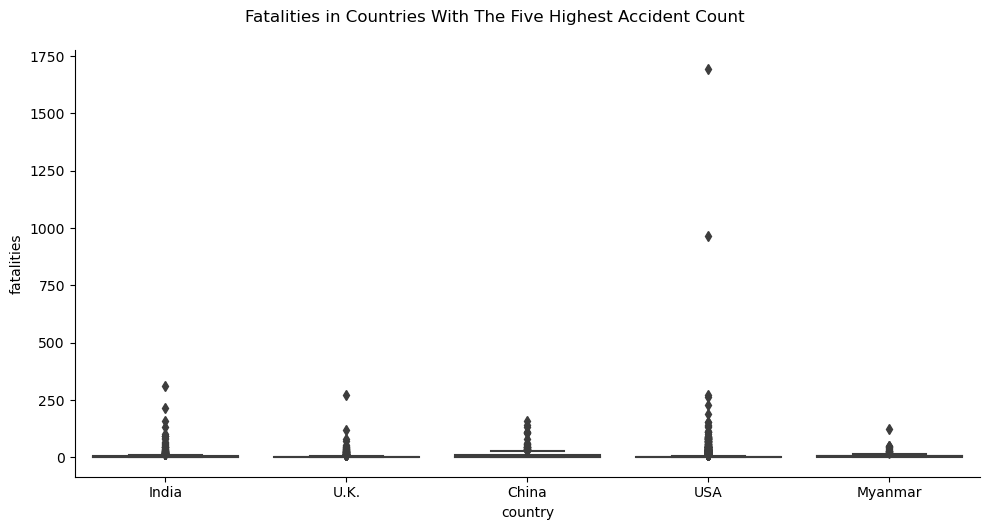

In [10]:
filter = df['fatalities'].isna()
filtered_df = df[~filter]
filter = filtered_df['country'].isin(top_5_array)
top_5_countries=filtered_df[filter]
facetgrid_obj = sns.catplot(x='country',y='fatalities',kind='box',data=top_5_countries,aspect = 2)
facetgrid_obj.fig.suptitle('Fatalities in Countries With The Five Highest Accident Count',y=1.05)
plt.show(facetgrid_obj)

As there are values that are too extreme that make it hard to see the answer we'll limit the fatalities cap to get a closer look at the mean.

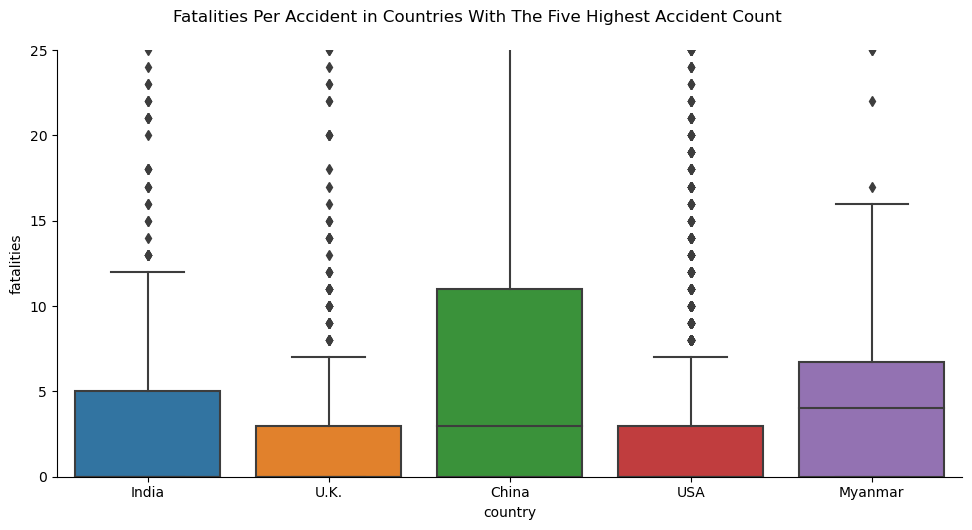

In [11]:
facetgrid_obj = sns.catplot(x='country',y='fatalities',kind='box',data=top_5_countries,aspect = 2)
facetgrid_obj.fig.suptitle('Fatalities Per Accident in Countries With The Five Highest Accident Count', y=1.05)
facetgrid_obj.axes[0,0].set_ylim(0,25)
plt.show(facetgrid_obj)

## Part B
**Based on the graph in the previous part of the question, which countries' median death count was the highest?**

As we were taught in TA the box plot has a special characteristic of displaying the mean (in this case of the fatalities) for each one of the elements (countries) in our dataframe.
As we can observe from the graph we can clearly see Myanmar's mean bar is by far higher than every other country therefore the final answer would be: **Myanmar**.

## Question 7
**Is there a correlation between the number of accidents to the year itself? There's no need to show a calculation of a regression line, visualization is sufficent.**

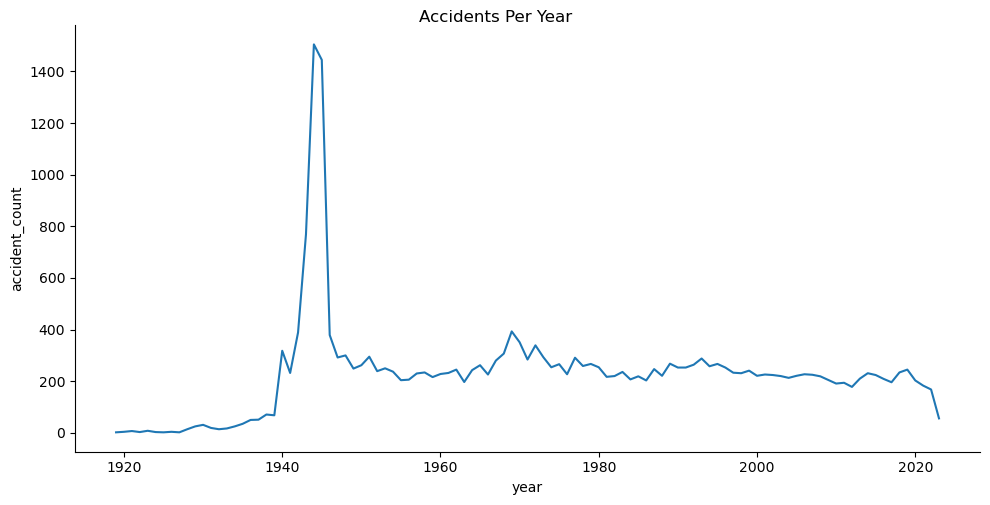

In [12]:
country_df = df.copy()
country_df.rename(columns={'cat':'accident_count'},inplace=True)
country_df = country_df.groupby(['year'])['accident_count'].count()
country_df = pd.DataFrame(country_df)
country_df.reset_index(inplace=True)

facetgrid_obj = sns.relplot(x='year', y = "accident_count",kind='line',data=country_df,aspect =2)
facetgrid_obj.fig.suptitle('Accidents Per Year',y=1)
plt.show(facetgrid_obj)

Based on the graph alone it seems as though throughout 1942 to 2019 there had been a roughly consistent amount of accidents per year. Although, reaching such conclusion is problematic, as we only considered the amount of accidents that occurred for a year rather than the amount of accidents compared to the total amount of flights taken.

## Question 8
**What are the names of the top 10 most dangerous planes(Planes which had the largest amount of accidents)?**

We already solved a question counting the accident count per plane type in question 3. We'll reuse it, and visualize it.

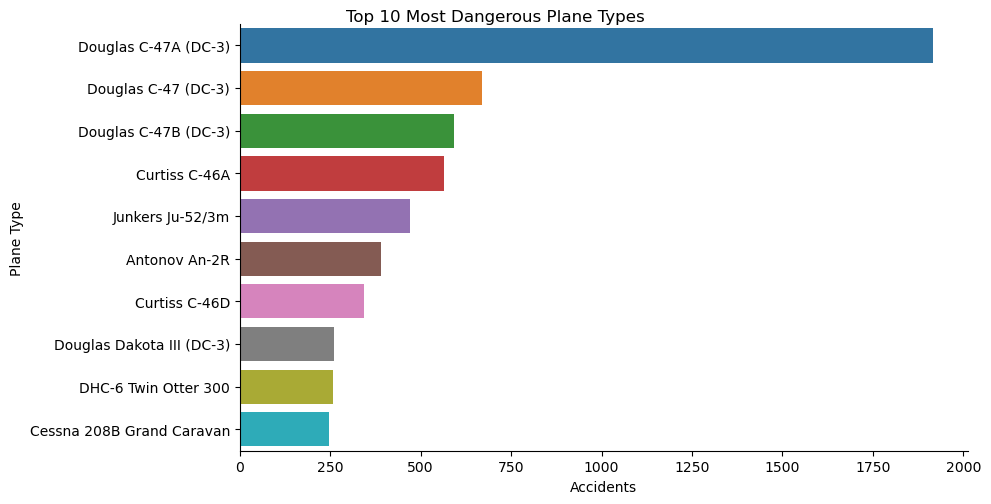

In [13]:
planecount.reset_index(inplace=True)
planecount = planecount.rename(columns={'index':'type'})
top_10_planes = planecount[0:10]
facetgrid_obj = sns.catplot(kind='bar',data=top_10_planes , y = 'type',x='accident_count',aspect = 2)
facetgrid_obj.fig.suptitle('Top 10 Most Dangerous Plane Types',y=1)
plt.show(facetgrid_obj.set(ylabel='Plane Type' ,xlabel='Accidents'))

## Question 9
Who are the three most dangerous operators (Operators which in their fleet have at least one plane that is on the top 10 most dangerous planes list you've listed in one of the previous questions)? Present the amount of accidents per operator.

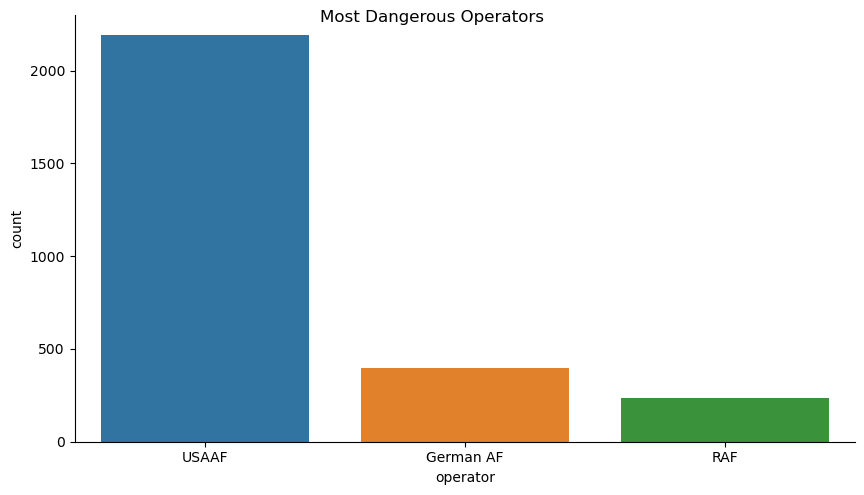

In [14]:

filter = df.type.isin(top_10_planes.type)
operators_df = df[filter]
operators_df = operators_df.groupby(['operator']).count()

operators_df.drop(columns={'year','fatalities','country','date','type'},inplace=True)
operators_df.sort_values(by='cat',ascending=False)
operators_df.rename(columns={'cat':'count'},inplace=True)
operators_df = operators_df.sort_values(by='count',ascending=False)
operators_df.reset_index(inplace=True)
top_3_op = operators_df[:3]

facetgrid_obj2 = sns.catplot(kind='bar', data = top_3_op, x='operator',y = 'count',aspect = 1.75)
facetgrid_obj2.fig.suptitle('Most Dangerous Operators')
plt.show(facetgrid_obj)

## Question 10 

## Part A
**Does the number of accidents of the top three most dangerous planes decrease over the year? Provide two possible explanations to the answer you presented.**

Based on the graph we can observe that over the years the number of ancident count for the top 3 most dangerous planes did subside in my opinion there are two possible reasons for this case:

(1) **Technological Improvment** - Over the years, since planes became increasingly popular. There had been technological leaps that made them less prone to malfunctions., as well as communication improvments which made flying in general a far safer endeavor.

(2) **frequency** - It could also be the case that these specific planes were pioneers in their field. In the early years of the flight industry they had been used as early stage prototypes and in their later lifespan even though they did not become anything but marginally safer they just fell out of use. As in, their accident-to-use ratio stayed the same. But, they were not used as much leading to a lower accident count.

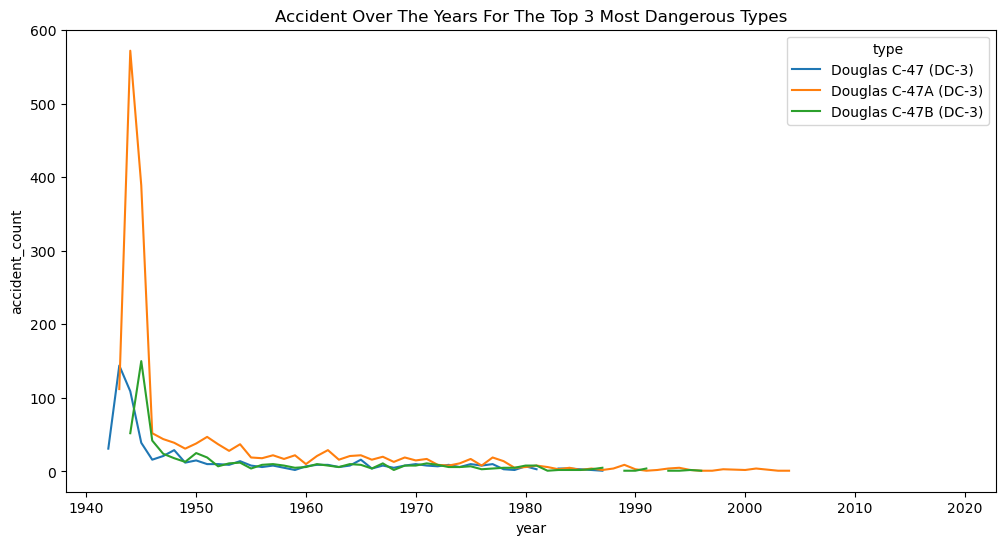

In [15]:
top_3_planes =top_10_planes.type[:3]
filter = df.type.isin(top_3_planes)
tmp= df[filter]
top_3_planes_df = tmp.groupby(['year','type']).count()
top_3_planes_df.drop(columns={'operator','fatalities','country','date'},inplace=True)
top_3_planes_df.rename(columns={'cat':'count'},inplace=True)
top_3_planes_df.reset_index(inplace=True)
top_3_planes_df = pd.pivot(top_3_planes_df,index = 'year',columns ='type',values='count')

plt.show(top_3_planes_df.plot(title = "Accident Over The Years For The Top 3 Most Dangerous Types",ylabel = 'accident_count',figsize=(12,6)))

## Part B
**Attempt to explain the abnormal observation**

We can see an abnormality in the graph, particullary with the "Douglas C-47A" plane type around the year 1942.Douglas sounds like an american name type and as we know, the US had officially entered WW2 at 1941 so it could be the case that the c-47A was the same type of airplane that millitary industrial complex against Imperial Japan.

# <font color=red> Part B - Hypothesis Testing and Simulation </font>

**In this exercise we would like to create a histogram of p-values from statistical hypothesis tests as described below.In order to do so follow these steps:**

## Question 1

**Given a person's height distributed normally with an average (expected value) of 175c"m and a deviation of 6c"m. Use the command np.random.normal to random a sample set of size n=40 of height in said population. Show using a graph the distributon of the data.**

## Part A
**Present the graph and answer the following question:**


**Is the graph a graph of a probability distribution or empirical distribution?**

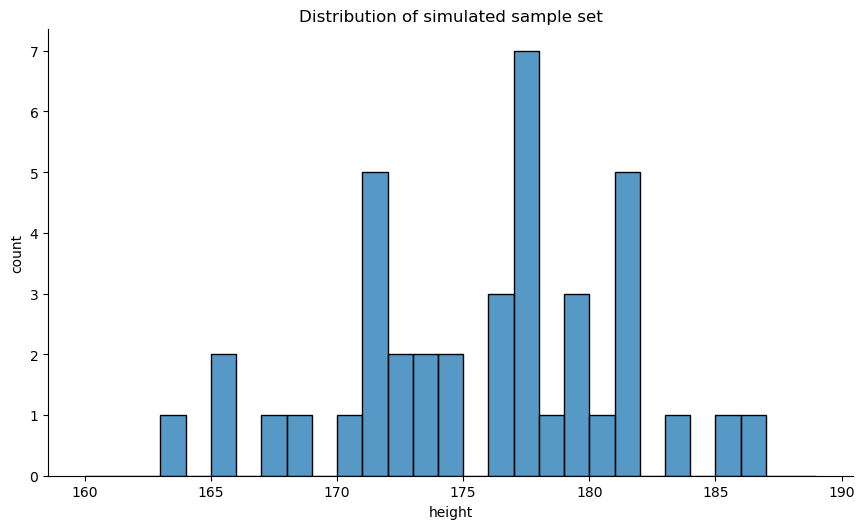

In [16]:
n=40
sample_set = np.random.normal(175,6,n)
newBins = np.arange(160, 190, 1)
facetgrid_obj = sns.displot(sample_set,bins=newBins, stat='count',aspect = 1.75)
facetgrid_obj.set(title='Distribution of simulated sample set', xlabel='height', ylabel='count')
plt.show(facetgrid_obj)

As the graph describes a distribution generated from an experiment, by definition it is an empirical distribution.

## Part B
**What is the average height in the sample that you generated?**

In [17]:
average = sample_set.sum()/n
print(f'the average of the generated sample set is {average}')

the average of the generated sample set is 175.84058316616466


## Part C
**What is the shape of the distribution that you generated? Specifically what is the skewness (symmetric, leaning left or leaning right)? What is the modality(Distribution with one extreme , two extremes, many exteremes , uniform)? How would you expect your answer to change if you were to take a sample of size n = 1000?**

The graph mildy resembles a binomial distribution and it has 3 peaks, in addition it seems symmetrical.

Given the function used to generate the heights I would expect the graph to depict a binomial distribution symmetrical to the point height = 175. However it could be the case that sample size 1000 would still not be big enough to accurately represent a binomial distribution due to bad luck.

Although not specifically requested, let's display the graph for n = 1000.

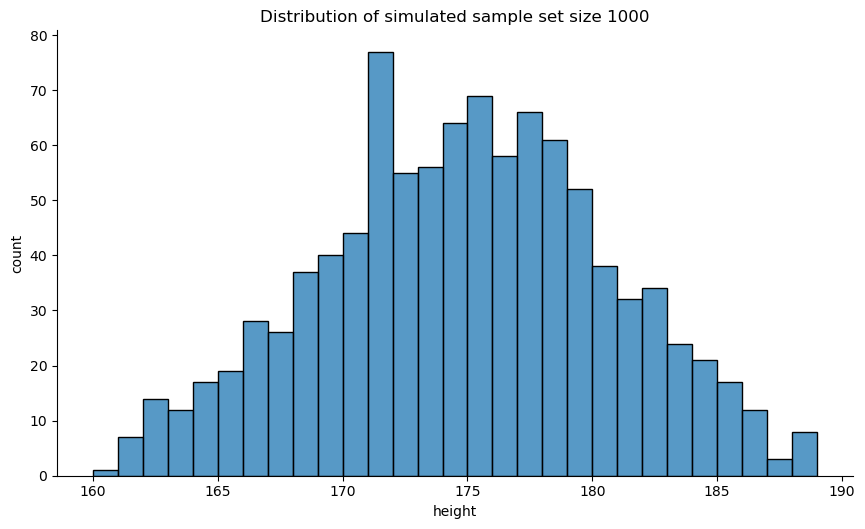

In [49]:
second_sample = np.random.normal(175,6,1000)
facetgrid_obj = sns.displot(second_sample,bins=np.arange(160, 190, 1), stat='count',aspect = 1.75)
facetgrid_obj.set(title='Distribution of simulated sample set size 1000', xlabel='height', ylabel='count')
plt.show(facetgrid_obj)

## Question 2

**Supposed you don't know the source of the sample that you generated in question 1 and you are interested in testing the hypothesis that the average height in the population from which it was taken is equal to 175 or the alternative hypothesis that the average is smaller than 175c"m**

## Part A
**Formalize the null hypothesis and the alternative hypothesis**

Denote by $p$ the average height in the population  
$$ 
H_0: p = 175 cm\
$$
$$
 H_1: p < 175 cm
$$


## Part B
**Test the hypothesis using simulations.Suppose that the variance in the population is known and is equal to 6c"m. Use 2000 simulations (num_repetitions = 2000)**

Assuming the null hypothesis is correct we will create an array containing average height from a module describing the average height is 175cm with a variance of 6. 

In [18]:
num_repetitions = 2000
def avg_height(n):
    average = np.random.normal(175,6,n).sum()/n
    return average
average_height = np.array([avg_height(n) for i in range(num_repetitions)])
facetgrid_obj = sns.displot(average_height,bins=newBins, stat='count',aspect = 1.75)

facetgrid_obj.axes[0,0].scatter(average,0,s=150,color='red')
facetgrid_obj.ax.set(xlabel='height')
facetgrid_obj.set(title='Distribution of 2000 Average heights Compared With the Sample', xlabel='height', ylabel='count')
facetgrid_obj.axes[0, 0].legend(['Sample Average Height Statistic'])

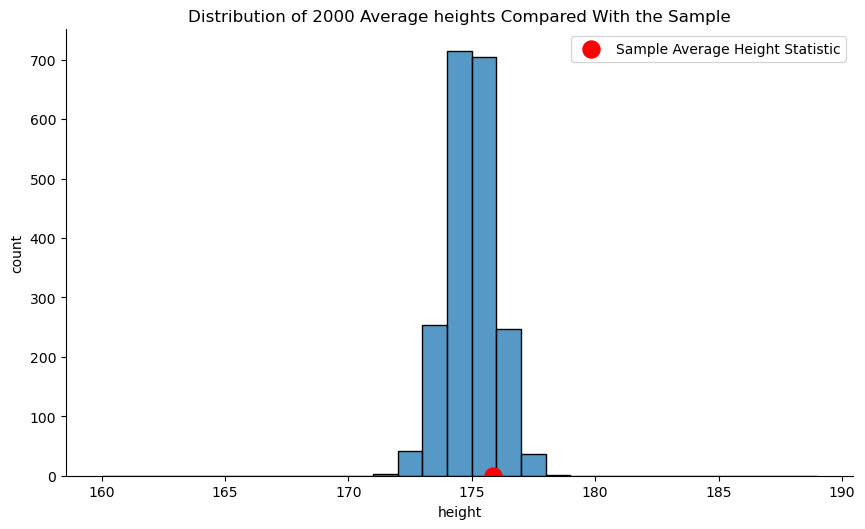

In [19]:
plt.show(facetgrid_obj)

Let us limit the range of the height and count to get a more accurate reading of the representation of the histogram.

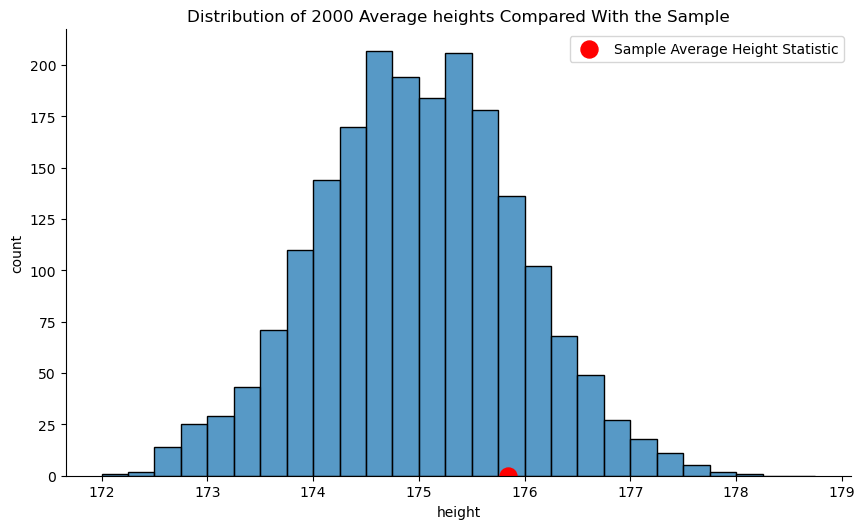

In [20]:
newBins = np.arange(172, 179, 0.25)
facetgrid_obj = sns.displot(average_height,bins=newBins, stat='count',aspect = 1.75)

facetgrid_obj.axes[0,0].scatter(average,0,s=150,color='red')
facetgrid_obj.ax.set(xlabel='height')
facetgrid_obj.set(title='Distribution of 2000 Average heights Compared With the Sample', xlabel='height', ylabel='count')
facetgrid_obj.axes[0, 0].legend(['Sample Average Height Statistic'])
plt.show(facetgrid_obj)

## Part C
**What is the p-value?**

In [44]:
count = 0
for i in range(num_repetitions):
    if average_height[i] <= average:
        count +=1 
print(f' The p value is {count/num_repetitions}')

 The p value is 0.8185


## Part D
**what conclusion would you draw assuming the statistical significance threshold is 0.1? What if the threshold is 0.01?**

For both thresholds I wouldn't deny the null hypothesis as the p value is clearly much heigher than both given thresholds.

## Question 3
**Implement the function <font color =blue> [get_p_value_heights(sample_heights,n,mean_0)] </font> which receives as input a sample set of heights (sample_heights) of length n and returns the p-value from the test which examines the hypothesis that the average height in the population is equal to 0_mean or smaller than it, under the assumption that the deviation in the population stands at 6c"m.**

In [22]:
def avg_height_generic(mean_0,n):
    average = np.random.normal(mean_0,6,n).sum()/n
    return average

def get_p_value_heights(sample_heights,n,mean_0):
    avg_of_smp = sample_heights.sum()/n
    num_rep = 2000
    avg_height = np.array([avg_height_generic(mean_0,n) for i in range(num_rep)])
    count = 0
    for i in range(num_rep):
        if avg_height[i] <= avg_of_smp:
            count+=1
    p_value = count/num_rep
    return p_value

## Question 4
**Using the function from question 3, we would like to repeat the steps from question 1 and 2 5000 times. Whereas in each iteration of the process we would randomize a new sample set of size n=40 of heights from the population and we'll calculate the p value of the null hypothesis which tests if the average height in the population from which it is taken is equal to 175cm (under the assumption the deviation is 6c"m)**

## Part A
**Without writing any code, discuss using a couple of sentences:**


**(1) How do you expect the histogram of 5000 p-values to look like?**


**(2) Explain your reasoning for (1).**


**(As long as the answer is reasoned well there is no incorrect answer to this question , attempt to answer before running the simulation)**

Based on the definition of the pvalue a probability to get a result equal to or more extreme than our real data we should expect to see a bell distribution.


Because the hypothesis test for each test contains many repetitions we should expect the average height to congregate at the true probability (since we know how it was generated) of 175.


As we rerun the experiment multiple times we would expect our avg height from the sample to be close to the centre of the distribution as we know they are both generated using a a nominal distribtuion with a deviation of 6 however, as the sample set and our hypothesis were generated using a small size (n=40) we should expect there to be a "noise" which could sway the averages from their true (theoretical) value.

However, by the law of averages (as we run 5000 p values of an average of 2000 sets) we should still expect to see a bell curve.

## Part B
**Implement the process detailed in the opening of the question and present the histogram of p values. (Note: the run time of the code might be long, you should try to run a small count of iterations first in order to make sure your code works)**


In [23]:
def Generate_P_Histo(histo_size,n,mean_0):
    p_histo = np.empty(histo_size)
    for i in range(histo_size):
        sample_set = np.random.normal(mean_0 , 6 ,n)
        p_histo[i] = (get_p_value_heights(sample_set,n,mean_0))
    return p_histo

In [41]:
p_histo = Generate_P_Histo(5000,40,175)

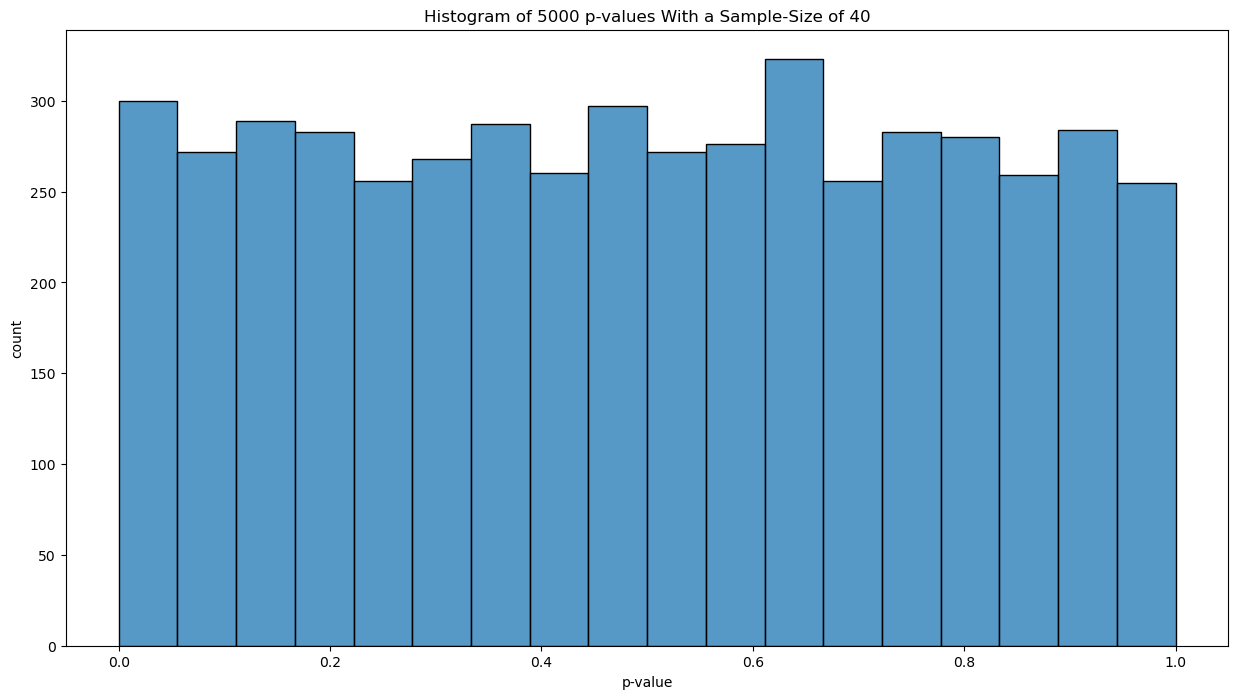

In [42]:
plt.figure(figsize=(15,8))
facetgrid_obj = sns.histplot(p_histo)
facetgrid_obj.set(title='Histogram of 5000 p-values With a Sample-Size of 40', xlabel='p-value', ylabel='count')
plt.show(facetgrid_obj)

## Part C
**What is approximately the distribution form of histogram of the p-values from part B? Does it match your expectations?**

The distribution depicted in part B represents a uniform distribution.

Reflecting back it seems the answer in A resulted in a misunderstanding of the nature of the p-value.

As p-value is defined as the probability to obtain a result equal to our sample set's average or more extreme towards the alternative hypothesis (in this case height < 175), as well as in this part of the assignment we know ( again,in this case **only**) that our null hypothesis is correct, therefore the distribution has to be uniform.

As both of our test_samples and the generated 2000 simulated cases for each p_value are re-generated for every p-value 5000 times, and on top we know they both distribute the same by the law of average we should expect the functions to distribute exactly the same. Meaning we could think of the single average of the our test sample to be a "part" of distribution of our simulated case meaning it has exactly same probability of being in at any point (extreme wise) of the original function which should in turn give us an equal probability of obtaining every p-value in its image [0,1].

Although that should be the case as our samplesize is small (40) it is likley that there will big variances in each one of our randoms generation which would in turn skew our pvalues, meaning that it might not form a uniform distribution.

## Part D
**From the p-values that you presented what is the percentage of values smaller than 0.05? Give a short explanation as to why its your answer is logical while considering the definition of p-value itself.**

First, we'll calculate the exact value as it cannot be displayed in a graph accurately (the p-value is too small and gets rounded down to 0.

In [43]:
count = 0
for i in range(2000):
    if p_histo[i] <= 0.05:
        count += 1
print(f'The percentage of p-values smaller than 0.05 is {count*100/2000}%')

The percentage of p-values smaller than 0.05 is 5.55%


Based on the explanation in the previous part (C) I expected and witnessed the p-value histogram distribute uniformly. Therefore, for any given value that could be presented in this question I would expect the possibility of p obtaining the value to be the value itself as all it means would be to sum every other p-value smaller than it as they have the same probability (uniform distribution).  

## Question 5
**What would happen, in your opinion given that the sample size would be increased from 40 to 200? Present a short explanation afterwhich test your opinion using simple code changes (Note: the run time would be even longer)**

As outlined in part A and C the distribution should , in theory at least, be uniform. In the previous question we did get a uniform distribution, however it wasn't perfectly uniform as the sample we are calculating the average from is too small an d introduced a strong variance per sample. However, it seems to not have impacted the distribution as much as I previously thought.


In this question however, we have an increase in the sample set size from 40 to 200 we should in turn "soften" the variance of each sample average which should hopefully yield a smoother uniform distribution.

In [29]:
p_histo_200 = Generate_P_Histo(5000,200,175)

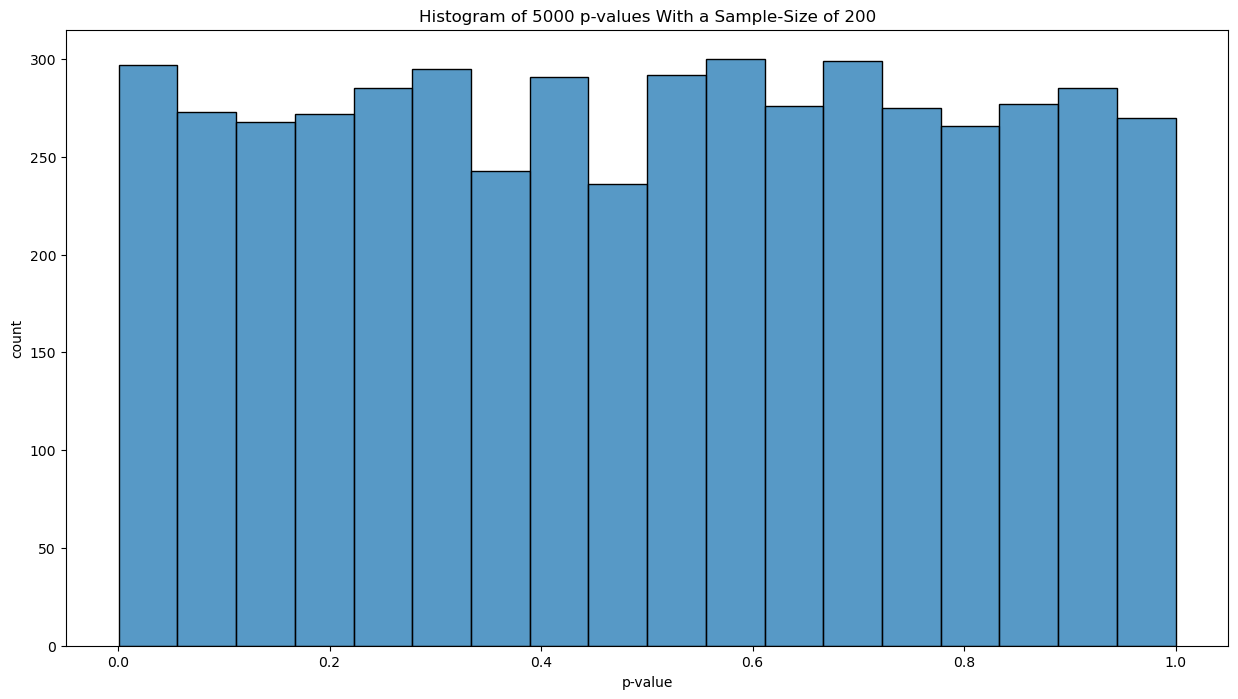

In [30]:
plt.figure(figsize=(15,8))
facetgrid_obj = sns.histplot(p_histo_200)
facetgrid_obj.set(title='Histogram of 5000 p-values With a Sample-Size of 200', xlabel='p-value', ylabel='count')

plt.show(facetgrid_obj)